For this problem set, you will need the following imports.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import quad
from scipy.optimize import root_scalar, root
from scipy.optimize import minimize, minimize_scalar


## Q1. Write the Python codes to find the zeros of the following functions.

Q1-1. $$ F(x) = \int_{x^2}^\infty \frac{1}{\sqrt{2\pi}} e^{-t^2/2} dt + e^{x} - 3x^3 + 2x + 4$$

In [2]:
# your code here
def func(x):
    #첫번쨰 값은 적분값, 두번째 값은 적분오차
    integral = quad(lambda t: np.exp(-t**2/2) / np.sqrt(2*np.pi),x**2, np.inf)[0]
    return integral + np.exp(x)-3*x**3+2*x+4

xvalues = np.linspace(-10,10,100000)
y = np.array([func(x) for x in xvalues])


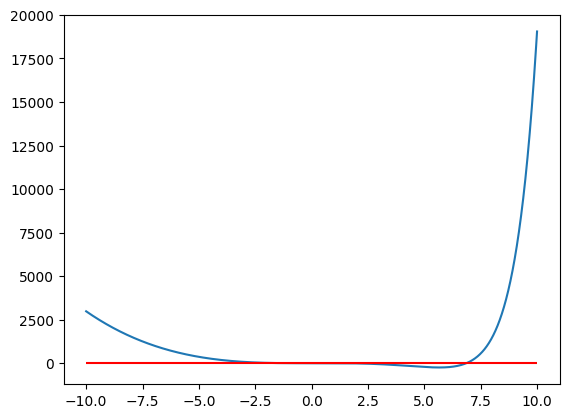

In [3]:
plt.plot(xvalues, y)
plt.hlines(y=0,xmin=-10,xmax=10,color='red')
plt.show()

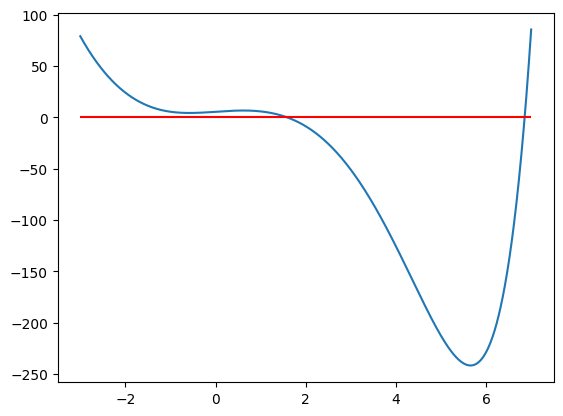

In [4]:
#위의 플롯을 확대해봄
xvalues2 = np.linspace(-3,7,100000)
y2 = np.array([func(x) for x in xvalues2])
plt.plot(xvalues2, y2)
plt.hlines(y=0,xmin=-3,xmax=7,color='red')
plt.show()

In [5]:
#x값들의 간격
unit=xvalues[2]-xvalues[1];unit
#부호의 변화가 일어나는 구간에 함숫값이 0이 되게 하는 해 x가 존재한다.
lastsign='plus'
for i in xvalues:
    if func(i)>=0:
        prevsign='plus'
    else:
        prevsign='minus'
    if prevsign!=lastsign:
        print(i-unit,i)
    lastsign=prevsign

1.5917159171591706 1.5919159191591916
6.854968549685498 6.855168551685519


In [6]:
#첫번째 해 = 1.5919120291931905
root_scalar(func, method='bisect', bracket=(1.5,1.6))


      converged: True
           flag: 'converged'
 function_calls: 38
     iterations: 36
           root: 1.5919120291931905

In [7]:
#두번째 해 = 6.855091523427109
root_scalar(func, method='bisect', bracket=(6.8,7))

      converged: True
           flag: 'converged'
 function_calls: 39
     iterations: 37
           root: 6.855091523427109

Q1-2. $$ F(x) = \int_{\sqrt{x}}^{x^2} \log(t) dt - \sqrt{x} - 3$$

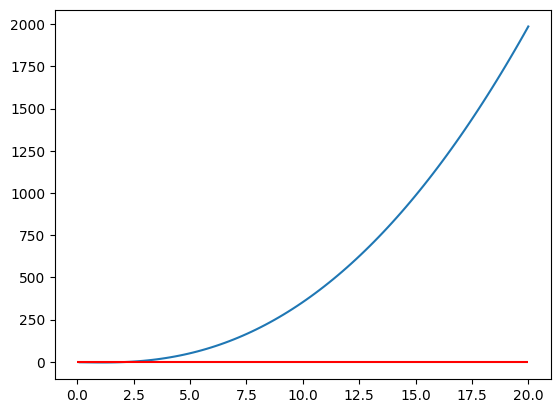

      converged: True
           flag: 'converged'
 function_calls: 41
     iterations: 39
           root: 2.3150876400923153


In [8]:
# your code here
def func2(x):
    integral = quad(lambda t: np.log(t), np.sqrt(x), x**2)[0]
    return integral- np.sqrt(x)-3

xvalues = np.linspace(0.1,20,100)
y = np.array([func2(x) for x in xvalues])

plt.plot(xvalues, y)
plt.hlines(y=0,xmin=0,xmax=20,color='red')
plt.show()

#find answer
#answer is 2.3150876400923153
print(root_scalar(func2, method='bisect', bracket=(2,3)))

Q1-3. 
$$
\begin{pmatrix}
F_1(x_1, x_2,\cdots,x_9) \\
\vdots \\
F_i(x_1, x_2,\cdots,x_9) \\
\vdots \\
F_9(x_1, x_2,\cdots,x_9)
\end{pmatrix}
=
\begin{pmatrix}
(3-2x_1)x_1 & -2x_2 & & & & & & +1 \\ 
& & & \vdots \\
& & -x_{i-1} & +(3-2x_i)x_i & -2x_{i+1} & & & +1 \\ 
& & & \vdots \\
& & & & & -x_8 & +(3-2x_9)x_9 & +1 \\ 
\end{pmatrix}
=
\begin{pmatrix}
0 \\
\vdots \\
0 \\
\vdots \\
0 \\
\end{pmatrix}
\text{for } i=2, \cdots\, 8
$$


In [238]:
def func3(x):
    lst=[(-x[i-1]+(3-2*x[i])*x[i]-2*x[i+1]+1) for i in range(1,8)]
    included_first_last_componentlst=[(3-2*x[0])*x[0]-2*x[1]+1]+lst+[-x[7]+(3-2*x[8])*x[8]+1]
    return np.array(included_first_last_componentlst)
    
#-1과1 사이 랜덤하게 초기값 지정해봄
initial_x= np.random.uniform(-1, 1, 9)
ans=root(func3, initial_x, method='lm')
print(initial_x)
print("x의 해 :", ans.x)

[-0.59218008 -0.73427716 -0.82541505 -0.20908546 -0.19754349 -0.10213678
 -0.94529984 -0.37945419 -0.14234333]
x의 해 : [-0.57065451 -0.68162834 -0.70173245 -0.70421294 -0.70136905 -0.69186564
 -0.66579201 -0.5960342  -0.41641206]


In [240]:
#구한 해를 통해 함수값이 어떻게 나오는지 다시 확인
x=[i for i in ans.x]
lst=[(-x[i-1]+(3-2*x[i])*x[i]-2*x[i+1]+1) for i in range(1,8)]
included_first_last_componentlst=[(3-2*x[0])*x[0]-2*x[1]+1]+lst+[-x[7]+(3-2*x[8])*x[8]+1]
print("함수값", included_first_last_componentlst)


함수값 [0.0, 0.0, -2.220446049250313e-16, 4.440892098500626e-16, 2.220446049250313e-16, 6.661338147750939e-16, -8.881784197001252e-16, 0.0, -2.220446049250313e-16]


## Consumer's Utiity Maximization Problem

There are many consumers in an economy who are different in labor productivity $x$. An individual consumer is endowed with one unit of time that can be used on either working to make money for consumption or enjoying as leisure. The wage per hour is given by $w$ that is determined in the market. All consumers receive the identical amount of lump-sum transfer $T$ from government. The utility function of the consumer is given by $ u(c, l) = c^{\frac{1}{3}} l^{\frac{2}{3}}$, where $c$ and $l$ denote consumption and leisure respectively. The consumer's problem can be written as follows:

$$
  \begin{align}
  \max_{c, l} c^{\frac{1}{3}} l^{\frac{2}{3}}\\
  \text{subject to}\quad c = wx(1-l) + T \\
  c \ge 0 \\
  0 \le l \le 1
  \end{align} 
$$
In the next two questions, we solve for the consumer's utility maximization problem in two different ways.


## Q2. Univariate function minimization


Q2-1. You may substitute the constraint (2) into the objective function (1) to make the problem an unconstrained univariable maximization problem with bounds (3) and (4). Write the Python function to compute the optimal consumption, leisure and labor supply $(c^*, l^*, N^s$) for an individual consumer with labor productivity $x$ given the lump-sum transfer $T$ and the market wage $w$. Within the function, solve for the utility maximization problem through the **Bounded** method.

In [45]:
#your code here
def utility_maximization(x, T, w):
    def objective(l):
        c = w * x * (1 - l) + T
        return - (c**(1/3) * l**(2/3)) 
    
    # Bounds for labor supply (0 to 1)
    bounds = (0, 1)
    
    # Solve the utility maximization problem using Bounded method
    result = minimize_scalar(objective, bounds=bounds, method='bounded')
    
    # Extract optimal leisure and consumption
    l_star = result.x
    c_star = w * x * (1 - l_star) + T
    
    # Calculate optimal labor supply
    Ns_star = 1-l_star
    
    return c_star, l_star, Ns_star

Q2-2. For the time being, assume that $w=2$, $T=0.5$ and $\sigma_x=0.3$. Draw the graphs for the optimal consumption and leisure for 30 individuals whose log productivities are equally distributed over the range $\log{x} \in [-3\sigma_x, +3\sigma_x]$.

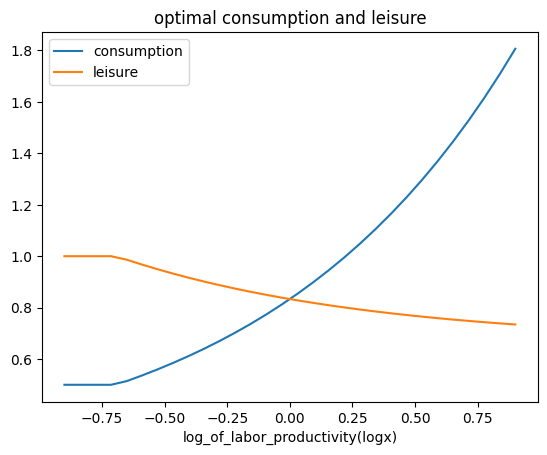

In [46]:
# your code here
w = 2
sigma_x = 0.3
T = 0.5

import numpy as np
logx = np.linspace(-3*sigma_x,3*sigma_x,30)
x = np.exp(logx)

consumption = []
leisure = []

for i in x:
    consumption.append(utility_maximization(i,T,w)[0])
    leisure.append(utility_maximization(i,T,w)[1])
    

plt.plot(logx, consumption)
plt.plot(logx, leisure)
plt.title('optimal consumption and leisure')
plt.legend(['consumption','leisure'])
plt.xlabel('log_of_labor_productivity(logx)')
plt.show()


Q2-3. Draw the labor supply curve for the following two individuals as the market wage varies over the range of $w\in[1,4]$.

- Individual 1: $\log{x} = -\sigma_x$
- Individual 3: $\log{x} = \sigma_x$


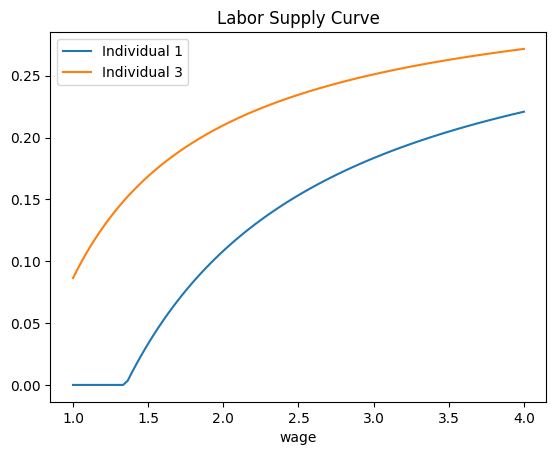

In [47]:
# your code here
wage = np.linspace(1,4,100)

#Individual1 
x1 = np.exp(-sigma_x)

labor1= []
for i in wage:
    labor1.append(utility_maximization(x1,T,i)[2])


#Individual3
x3 = np.exp(sigma_x)
labor3 = []
for i in wage:
    labor3.append(utility_maximization(x3,T,i)[2])

plt.plot(wage,labor1)
plt.plot(wage,labor3)
plt.xlabel('wage')
plt.title('Labor Supply Curve')
plt.legend(['Individual 1','Individual 3'])
plt.show()

## Q3. Minimization of multivariate function with constraint

Q3-1. In this question, we will solve for the utility maximization as specified by equations (1)~(4). Write the Python function to compute the optimal consumption, leisure and labor supply $(c^*, l^*, N^s$) for an individual consumer with labor productivity $x$ given the lump-sum transfer $T$ and the market wage $w$. Within the function, solve for the utility maximization problem through the **Sequential Lest Squares Programming** algorithm.

In [71]:
# your code here
from scipy.optimize import Bounds

def utility_maximization2(x, T, w):
    # Objective function
    def objective(X):
        c=X[0]
        l=X[1]
        return - (c**(1/3) * l**(2/3)) 
    
    # Constraint
    bounds = Bounds(lb=[0, 0], ub=[np.inf, 1.0])
    eq_cons = {'type': 'eq',
                   'fun' : lambda X: np.array([X[0]-w*x*(1-X[1])-T])}
                   
    initial_guess=[0,0]
    optimal = minimize(objective, initial_guess, method='SLSQP', bounds=bounds, constraints=[eq_cons])
    
    # Extract optimal leisure and consumption
    c_star = optimal.x[0]
    l_star = optimal.x[1]
    
    
    # Calculate optimal labor supply
    Ns_star = 1-l_star
    
    return c_star, l_star, Ns_star

Q3-2. Do again Q2-2 and Q2-3 using the function in Q3-1.

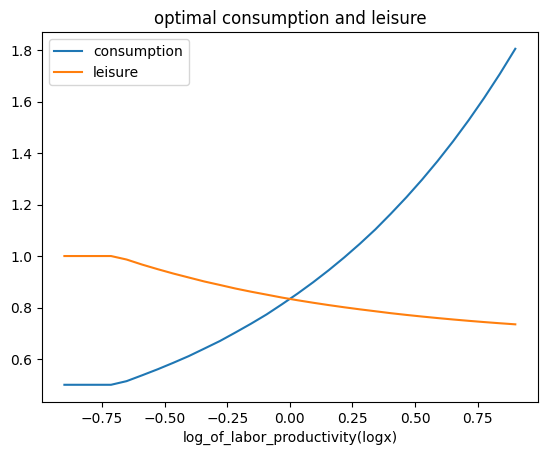

In [72]:
# Do again Q2-2 with utility_maximization2
w = 2
sigma_x = 0.3
T = 0.5

import numpy as np
logx = np.linspace(-3*sigma_x,3*sigma_x,30)
x = np.exp(logx)

consumption = []
leisure = []

for i in x:
    consumption.append(utility_maximization2(i,T,w)[0])
    leisure.append(utility_maximization2(i,T,w)[1])
    

plt.plot(logx, consumption)
plt.plot(logx, leisure)
plt.title('optimal consumption and leisure')
plt.legend(['consumption','leisure'])
plt.xlabel('log_of_labor_productivity(logx)')
plt.show()


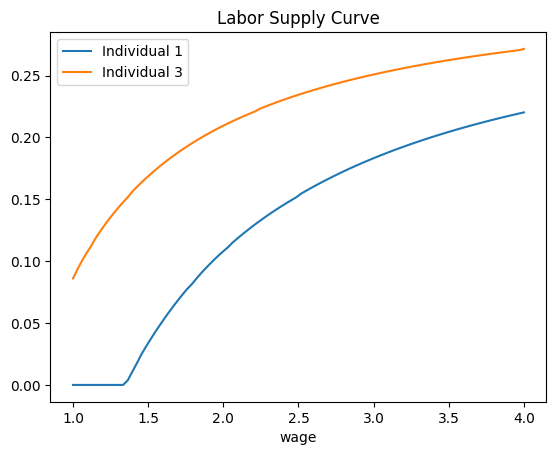

In [73]:
# Do again Q2-2 with utility_maximization2
wage = np.linspace(1,4,100)

#Individual1 
x1 = np.exp(-sigma_x)

labor1= []
for i in wage:
    labor1.append(utility_maximization2(x1,T,i)[2])


#Individual3
x3 = np.exp(sigma_x)
labor3 = []
for i in wage:
    labor3.append(utility_maximization2(x3,T,i)[2])

plt.plot(wage,labor1)
plt.plot(wage,labor3)
plt.xlabel('wage')
plt.title('Labor Supply Curve')
plt.legend(['Individual 1','Individual 3'])
plt.show()

Q3-3. Suppose that there are 10,000 individuals in the economy whose labor productivities are drawn from the following distributionis: $\log{x}\sim N(0, \sigma_x^2)$. Each individual behaves according to the utility maximization problem described above. Compute and draw histogram of the labor supplies of 10,000 individuals assuming the market wage being equal to 2.

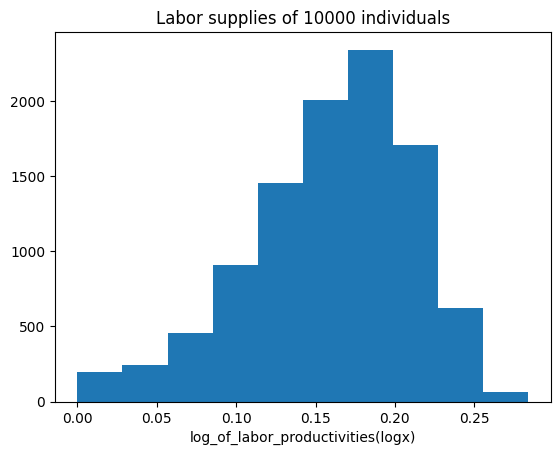

In [78]:
# your code here
w=2
T = 0.5

logx = np.random.normal(0,sigma_x,10000)
x = np.exp(logx)

save_labor = []
for i in x:
    save_labor.append(utility_maximization2(i,T,w)[2])
plt.hist(save_labor)

plt.title('Labor supplies of 10000 individuals')
plt.xlabel('log_of_labor_productivities(logx)')
plt.show()

Q3-4. Draw the aggregate labor supply curve of the above economy as the market wage varies over the range of $w\in[1,4]$.

- create 15 grids of the market wages $w\in[1,4]$.
- for each $w$ compute labor supplies of 10,000 inividuals with different labor productivity as you did in Q3-3.
- the aggregate labor supply for a given $w$ is equal to the mean of labor supplies of the 10,000 individuals.
- plot the aggregate labor supply curve.

Text(0.5, 0, 'wage')

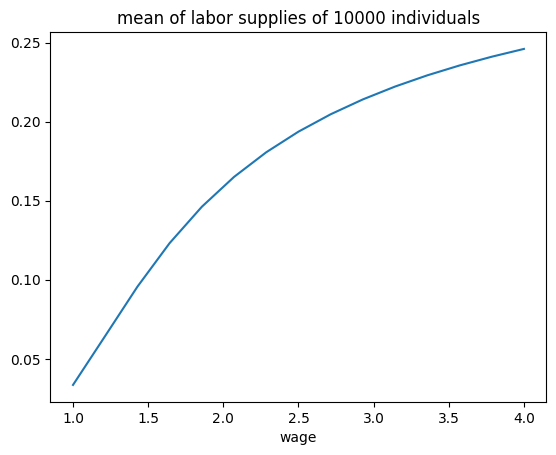

In [86]:
# your code here
w = np.linspace(1,4,15)
mean_labor_per_wage = []
logx = np.random.normal(0,sigma_x,10000)
x = np.exp(logx)
for wage in w:
    save_labor = []
    for i in x:
        save_labor.append(utility_maximization2(i,T,wage)[2])
    mean_labor_per_wage.append(np.mean(save_labor))
    
plt.plot(w,mean_labor_per_wage)
plt.title('mean of labor supplies of 10000 individuals')
plt.xlabel('wage')